# Домашняя работа №1

В этой домашней работе вам предлагается ознакомиться с базовой функциональностью Python и устройством Jupyter Notebook, а так же познакомиться с простыми функциями из пакетов NumPy и matplotlib.

Следуйте инструкциям нотебука, решайте задачи, а ответы заполняйте в следующую форму: https://forms.gle/gxG8D5BGeH1nxcSU8

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from tasks import find_fold_number, rle, test_rle_str

# увеличим изначальный размер графиков
plt.figure(figsize=(15, 10))

# отображение графиков внутри нотебука
%matplotlib inline
# графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 
# автоматическая перезагрузка функций из локальных модулей
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# NumPy & matplotlib

Для следующих заданий необходимо реализовать код внутри ячейки. Постарайтесь воспользоваться функциональностью пакетов, избегая ненужных циклов и т.п.

Про `NumPy` можно почитать тут:
[NumPy quickstart](https://docs.scipy.org/doc/numpy/user/quickstart.html)

Про `matplotlib` тут:
[PyPlot tutorial](https://matplotlib.org/tutorials/introductory/pyplot.html)

В данной части задания будут базироваться на датасете $\textit{Ирисы Фишера}$, первым делом его необходимо скачать

In [6]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data -P assignment_1/data

--2020-02-28 22:25:26--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Распознаётся archive.ics.uci.edu (archive.ics.uci.edu)… 128.195.10.252
Подключение к archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 4551 (4,4K) [application/x-httpd-php]
Сохранение в: «assignment_1/data/iris.data.1»

iris.data.1         100%[===================>]   4,44K  --.-KB/s    за 0s      

2020-02-28 22:25:27 (31,1 MB/s) - «assignment_1/data/iris.data.1» сохранён [4551/4551]



Ирисы Фишера состоят из данных о 150 экземплярах ириса — Ирис щетинистый (Iris setosa), Ирис виргинский (Iris virginica) и Ирис разноцветный (Iris versicolor). Для каждого экземпляра измерялись четыре характеристики (в сантиметрах):

1. Длина наружной доли околоцветника (англ. sepal length);
2. Ширина наружной доли околоцветника (англ. sepal width);
3. Длина внутренней доли околоцветника (англ. petal length);
4. Ширина внутренней доли околоцветника (англ. petal width).

In [16]:
iris_full = np.genfromtxt('assignment_1/data/iris.data', delimiter=',', dtype='object')
names = ('sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'species')
iris_vals = iris_full[:, :-1].astype(np.float)
iris_name = iris_full[:, -1].astype(np.str)
n_iris = iris_vals.shape[0]

In [14]:
n_rows = 10
template = '{:^15}' * len(names)
print(template.format(*names))
for vals, name in zip(iris_vals[:n_rows], iris_name[:n_rows]):
    print(template.format(*vals, name))

  sepallength    sepalwidth     petallength    petalwidth       species    
      5.1            3.5            1.4            0.2        Iris-setosa  
      4.9            3.0            1.4            0.2        Iris-setosa  
      4.7            3.2            1.3            0.2        Iris-setosa  
      4.6            3.1            1.5            0.2        Iris-setosa  
      5.0            3.6            1.4            0.2        Iris-setosa  
      5.4            3.9            1.7            0.4        Iris-setosa  
      4.6            3.4            1.4            0.3        Iris-setosa  
      5.0            3.4            1.5            0.2        Iris-setosa  
      4.4            2.9            1.4            0.2        Iris-setosa  
      4.9            3.1            1.5            0.1        Iris-setosa  


In [139]:
from math import factorial

def puasson(n, p, m):
    l = n * p
    return ((l ** m) / (factorial(m))) * np.exp(-l)

def laplas(n, p, m):
    x = (m - n * p) / (np.sqrt(n * p * (1 - p)))
    phi = np.exp(-x*x/2) / np.sqrt(2 * np.pi)
    return phi / np.sqrt(n * p * (1 - p))

print(puasson(5000, 0.0002, 2))
print(laplas(10000, 0.5, 5000))

0.18393972058572117
0.007978845608028654


## 1. Какое максимальное значение для каждого признака
Ответом будет последовательность из 4 чисел  
Например: `5.1 3.5 1.4 0.2`

In [24]:
np.amax(iris_vals, axis=0)

array([7.9, 4.4, 6.9, 2.5])

## 2. Сколько каждого типа ириса представленно в данных
Ответом будет последовательность из 3 чисел в порядке: `Iris-setosa, Iris-versicolor, Iris-virginica`  
Например: `10 10 10`

In [88]:
unique = np.unique(iris_name, return_counts=True)[1]
unique

array([50, 50, 50])

## 3. Среднее значение признака `petalwidth` для каждого типа ириса
Ответом будет последовательность в возврастающем порядке с округлением до 2 знаков после запятой.  
Например: `1.23 4.56 7.89` 

In [159]:
ans = []
for i in range(len(unique)):
    mask = np.unique(iris_name)[i] == iris_name
    xs = np.ma.array(iris_vals[:, -1], mask=list(np.invert(mask)))
    ans.append(xs.mean())
print(sorted(ans))

[0.244, 1.3260000000000003, 2.026]


In [173]:
iris_full = np.hstack([iris_vals, iris_name.reshape(-1, 1)])
unique = np.unique(iris_name)
iris_types = {}
for name in unique:
    iris_types[name] = iris_full[iris_full[:, -1] == name][:, :-1].astype(np.float)
    print(iris_types[name][:, -1].mean())

0.244
1.3259999999999998
2.0260000000000002


## 4. Попарное скалярное произведение признаков
Ответом будет среднее значение попарных скалярных произведений векторов признаков с округлением до 2 знаков после запятой.  
Скалярное произведение вектора с самим собой учитывать не надо.  
Например: `12.34`

In [174]:
import itertools
ans = [np.dot(iris_vals[:, i], iris_vals[:, j]) for (i, j) in itertools.combinations(range(4), 2)]
np.mean(np.array(ans))

1726.215

## 5. У какого типа ириса самое маленькое значение признака `sepalwidth`

In [175]:
iris_name[iris_vals[:, 1].argmin()]

'Iris-versicolor'

## 6. Постройте график распределения значений для `petallength` взависимости от типа ириса
В качестве ответа укажите тип ириса с наименьшей дисперсией (самый "узкий")

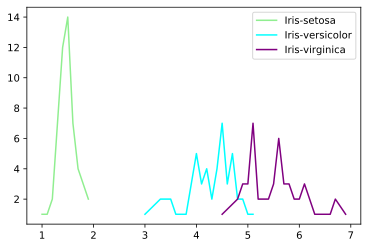

In [201]:
import collections, itertools

colors = ['lightgreen', 'cyan', 'purple']
cnt = 0
for name, vals in iris_types.items():
    counter = collections.Counter(vals[:, 2])
    x = np.array(list(counter.keys()))
    y = np.array(list(counter.values()))
    new_x, new_y = zip(*sorted(zip(x, y)))
    plt.plot(new_x, new_y, color=colors[cnt], label=name)
    plt.legend()
    cnt += 1
    

## 7. Отобразите зависимость между `petallength` и `petalwidth` взависимости от типа ириса
по оси X - petallength   
по оси Y - petalwidth  
В ответе укажите класс, который отделился от остальных

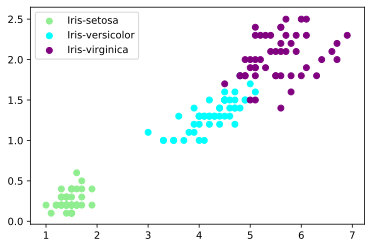

In [202]:
colors = ['lightgreen', 'cyan', 'purple']
cnt = 0
for name, vals in iris_types.items():
    x = vals[:, 2]
    y = vals[:, 3]
    plt.scatter(x, y, color=colors[cnt], label=name)
    plt.legend()
    cnt += 1

## 8. Постройте boxplot признака `sepallength` для каждого типа Ириса
В ответе укажите количество выбросов в данных  
Каждый выброс отображается точкой, подробнее про boxplot можно почитать [здесь](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

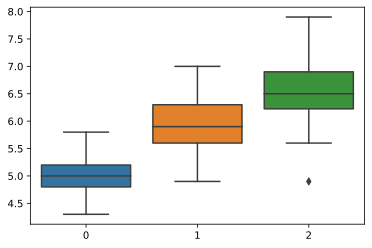

In [250]:
import seaborn as sns

data = []
for name, vals in iris_types.items():
    data.append(vals[:, 0])
data = np.array(data)
sns.boxplot(data=data.T)

# Python
Для следующих заданий необходимо реализовать соответствующую функцию в файле `tasks.py`.

После реализации, выполните соответствующую ячейку, не изменяя её содержимое.

## 9. За сколько шагов можно получить однозначное число перемножая цифры предыдущего числа.
Например, для $88$ ответ $3$:
$$
88 \rightarrow 8 \times 8 = 64 \rightarrow 6 \times 4 = 24 \rightarrow 2 \times 4 = 8
$$
Для этого задания, реализуйте функцию `find_fold_number`

In [275]:
assert find_fold_number(88) == 3, "неправильный ответ для числа из примера"
find_fold_number(24)

1

В качестве ответа укажите результат выполнения следующей ячейки (без кавычек)

In [260]:
''.join(map(str, (find_fold_number(i) for i in range(500))))

'00000000001111111111111112222211112222231112222323112223232311222232331122332433112222333311233333321111111111111111111111111222221111222223111222232311222323231122223233112233243311222233331123333332111111111111111222221112222323112222323311222233331222222222122332334212323234231223324233123332233311111111111111222223112222323311233333321223323342122324222312333223331223323444123342343313322334331111111111111222232311222233331223323342122332423312222222221233423433133322443312343233341332323343'

## 10. Кодирование длин серии
Кодирование длин серий (RLE) — алгоритм сжатия данных, заменяющий повторяющиеся символы на один символ и число его повторов. Серией называется последовательность, состоящая из нескольких одинаковых символов (более одного). При кодировании строка одинаковых символов, составляющих серию, заменяется строкой, содержащей сам повторяющийся символ и количество его повторов.

Например, для $\textit{AAAAAAAAAAAAAAABAAAA}$ будет сжата в $\textit{A15BA4}$

Для этого задания реализуйте функцию `rle`

In [265]:
assert rle('AAAAAAAAAAAAAAABAAAA') == 'A15BA4', "неправильный ответ для строки из примера"

В качестве ответа укажите результат выполнения следующей ячейки (без кавычек)

In [266]:
rle(test_rle_str)

'f4b13s13g15e12l18o12f4i6r14u8m5i15q3x17z6w4z19o7k10i16z16h7o10c14r7k3x17k2s8mc3d11p14n14s12b5ra6sj10k9r9y12a11u12w10g8l9v11b2g15q6l15x10a5e13v13d11pc4d16p15s12d18z19a19bf9k5x5w5h12t9r18o19c16p3h12u6r19y17j24g3a3x11l8u10m10f6m18g14t3j19'